In [1]:
import pandas as pd
import random 
import numpy as np 
import seaborn

In [2]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [3]:
len(L)

10000

In [4]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [5]:
np.cumsum(s)

2     0.0310
3     0.0869
4     0.1662
5     0.2755
6     0.4071
7     0.5730
8     0.7123
9     0.8258
10    0.9120
11    0.9685
12    1.0000
Name: count, dtype: float64

<Axes: >

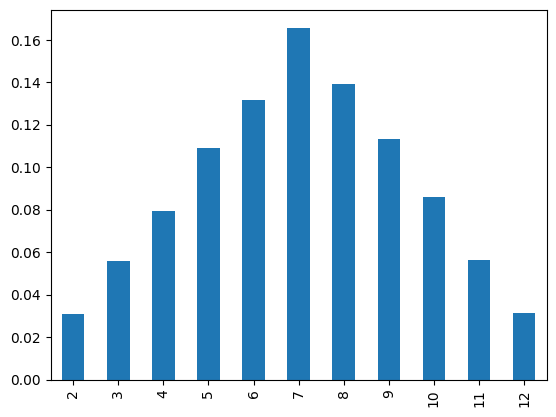

In [6]:
s.plot(kind='bar')

<Axes: >

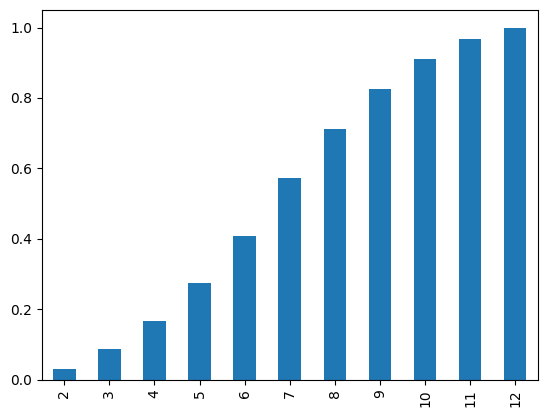

In [7]:
np.cumsum(s).plot(kind='bar')

### Parametric Density Estimation

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [9]:
sample.mean()

np.float64(49.98047299511577)

(array([  2.,  12.,  80., 193., 282., 251., 131.,  41.,   6.,   2.]),
 array([32.59177834, 36.22598995, 39.86020155, 43.49441315, 47.12862476,
        50.76283636, 54.39704797, 58.03125957, 61.66547118, 65.29968278,
        68.93389438]),
 <BarContainer object of 10 artists>)

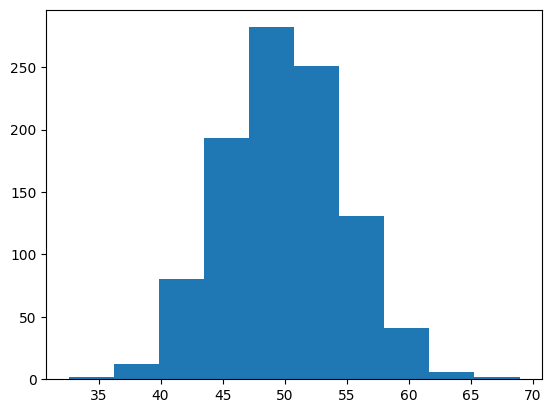

In [10]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [11]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [12]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [13]:
values = np.linspace(sample.min(),sample.max(),100)

In [14]:
sample.max()

np.float64(68.93389438454007)

In [15]:
probabilities = [dist.pdf(value) for value in values]

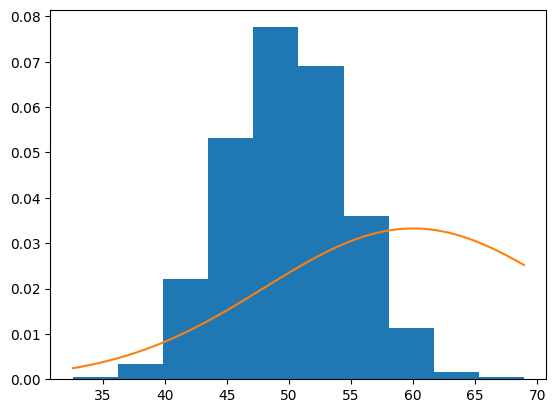

In [16]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\ieish\AppData\Local\Temp\ipykernel_6688\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

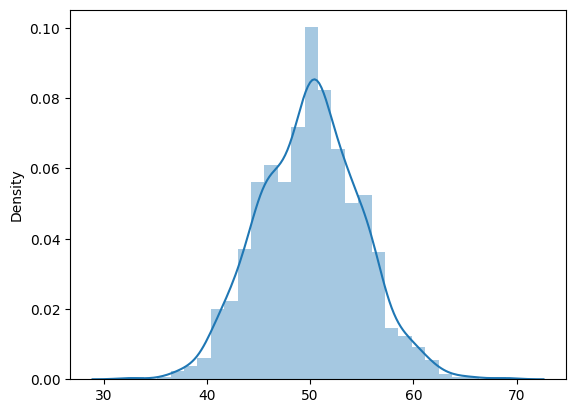

In [17]:
import seaborn as sns
sns.distplot(sample)

### KDE

In [18]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  2.,  5.,  2.,  6.,  3.,  7., 15., 18., 19., 16., 20., 16.,
        24., 30., 19., 30., 16., 12.,  9.,  8.,  8., 12.,  6., 13., 17.,
        16., 23., 38., 35., 44., 47., 47., 58., 63., 45., 43., 46., 35.,
        34., 35., 25., 10.,  6.,  4.,  6.,  3.,  1.,  1.,  1.]),
 array([ 6.68498195,  7.66100401,  8.63702608,  9.61304814, 10.5890702 ,
        11.56509227, 12.54111433, 13.5171364 , 14.49315846, 15.46918053,
        16.44520259, 17.42122465, 18.39724672, 19.37326878, 20.34929085,
        21.32531291, 22.30133498, 23.27735704, 24.2533791 , 25.22940117,
        26.20542323, 27.1814453 , 28.15746736, 29.13348943, 30.10951149,
        31.08553355, 32.06155562, 33.03757768, 34.01359975, 34.98962181,
        35.96564388, 36.94166594, 37.917688  , 38.89371007, 39.86973213,
        40.8457542 , 41.82177626, 42.79779833, 43.77382039, 44.74984245,
        45.72586452, 46.70188658, 47.67790865, 48.65393071, 49.62995278,
        50.60597484, 51.5819969 , 52.55801897, 53.53404103,

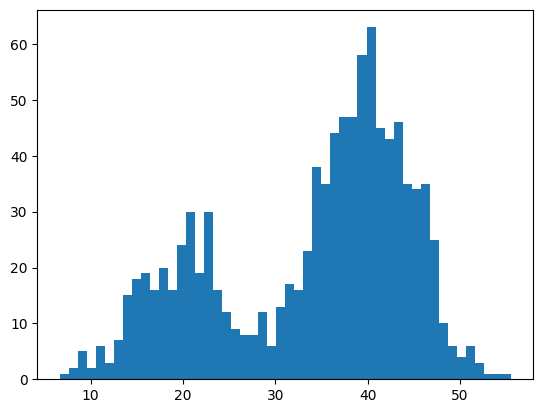

In [19]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [20]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

,bandwidth,5
,algorithm,'auto'
,kernel,'gaussian'
,metric,'euclidean'
,atol,0
,rtol,0
,breadth_first,True
,leaf_size,40
,metric_params,None


In [21]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

In [22]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

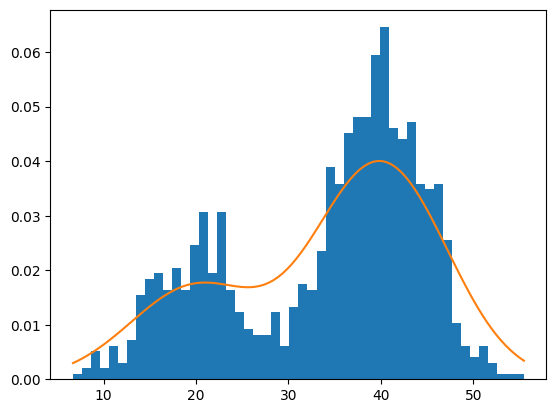

In [23]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

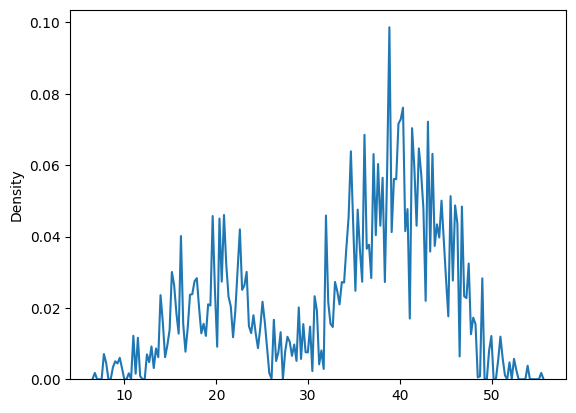

In [24]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)